In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path,dir,files = next(os.walk('/content/drive/Shareddrives/Machine Learning/DeGreenProject/Dataset/Train/Black Soil'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  148


In [ ]:
image_shape = (224,224)
TRAINING_DIR = "/content/drive/Shareddrives/Machine Learning/DeGreenProject/Dataset/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/Shareddrives/Machine Learning/DeGreenProject/Dataset/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=image_shape,
                                                       class_mode='categorical',
                                                       batch_size=32)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=image_shape,
                                                              class_mode='categorical',
                                                              batch_size=8)

Found 519 images belonging to 5 classes.
Found 212 images belonging to 5 classes.


In [ ]:
Model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),

    # 128 neuron in the fully-connected layer

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

Model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0005),
              metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc') > 0.92 and logs.get('acc') > 0.92): # Experiment with changing this value
      print("\nReached 95% Validation Accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = Model.fit(train_generator, epochs = 50,
                          validation_data=validation_generator, callbacks= [callbacks])

Epoch 1/50
17/17 [==============================] - 302s 18s/step - loss: 1.5555 - acc: 0.2794 - val_loss: 1.6430 - val_acc: 0.2358
Epoch 2/50
17/17 [==============================] - 47s 3s/step - loss: 1.3151 - acc: 0.4644 - val_loss: 1.3418 - val_acc: 0.5330
Epoch 3/50
17/17 [==============================] - 45s 3s/step - loss: 0.9553 - acc: 0.6724 - val_loss: 2.3011 - val_acc: 0.4481
Epoch 4/50
17/17 [==============================] - 45s 3s/step - loss: 0.8898 - acc: 0.6667 - val_loss: 0.8228 - val_acc: 0.6887
Epoch 5/50
17/17 [==============================] - 47s 3s/step - loss: 0.6903 - acc: 0.7245 - val_loss: 1.1451 - val_acc: 0.6415
Epoch 6/50
17/17 [==============================] - 50s 3s/step - loss: 0.7054 - acc: 0.6898 - val_loss: 0.8159 - val_acc: 0.6462
Epoch 7/50
17/17 [==============================] - 50s 3s/step - loss: 0.6608 - acc: 0.7187 - val_loss: 1.4429 - val_acc: 0.5896
Epoch 8/50
17/17 [==============================] - 45s 3s/step - loss: 0.6076 - acc: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


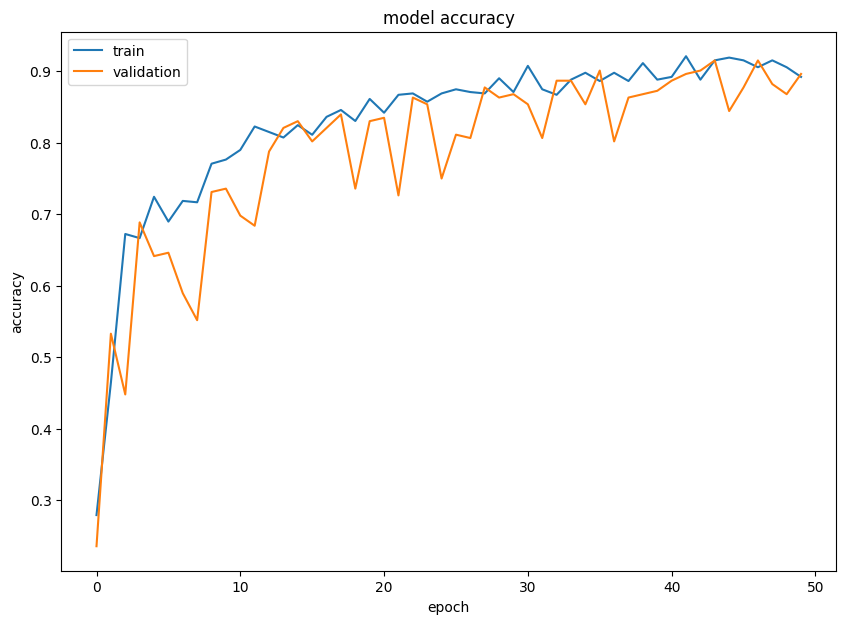

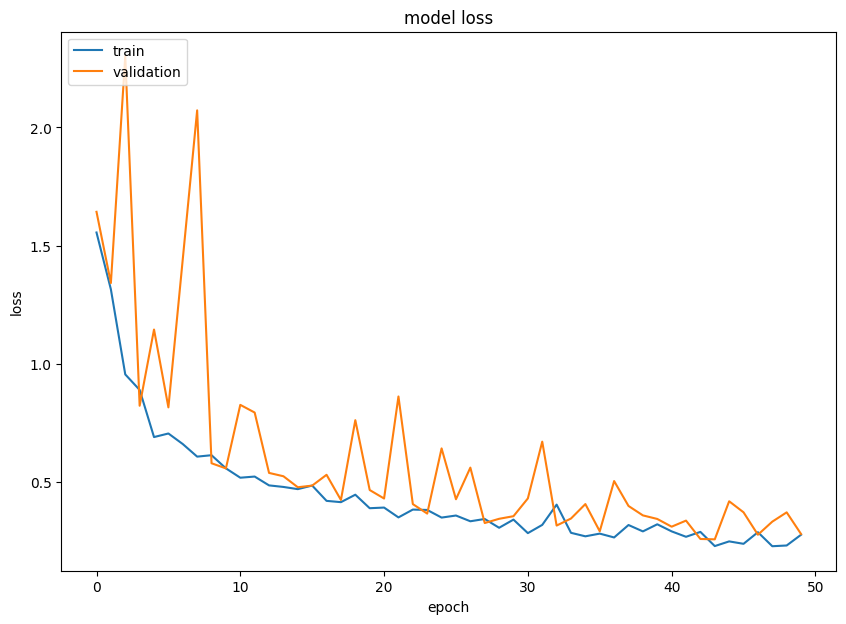

In [ ]:
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(224, 224))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = Model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0][0]>0.7:
    print(fn + " is a Aluvial Soil")
  elif classes[0][1]>0.7:
    print(fn + " is a Black Soil")
  elif classes[0][2]>0.7:
    print(fn + " is a Cinder Soil")
  elif classes[0][3]>0.7:
    print(fn + " is a Clay Soil")
  else:
    print(fn + " is a Red Soil")

Saving red.jpeg.jpg to red.jpeg.jpg
1/1 [==============================] - 0s 168ms/step
[9.8985877e-09 6.8596351e-10 1.4593932e-05 5.6461812e-07 9.9998486e-01]
red.jpeg.jpg is a Red Soil


In [ ]:
Model.save('soil_classification_model2.h5')